In [31]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(상권변화지표-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(20710, 11)

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

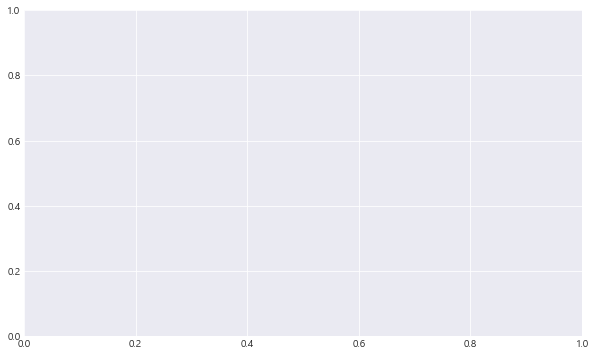

In [14]:
# 상권 변화 지표별 색상 설정 => 프론트에서 LL HL 등에 따라 색으로 어떤 상태인지 보여주는게 더 좋아 보임
color_map = {
    "상권확장": "green",
    "상권축소": "red",
    "정체": "blue",
    "다이나믹": "orange"
}

# 특정 상권 코드
target_market_code = 3110014

# 특정 상권 코드에 대한 데이터 필터링
target_df = df[df["상권_코드"] == target_market_code]

# 그래프 그리기
plt.figure(figsize=(10, 6))

for index, row in target_df.iterrows():
    change_type = row["상권_변화_지표_명"]
    plt.bar(row["기준_년분기_코드"], 1, color=color_map[change_type], label=change_type)

plt.xlabel('기준 년분기 코드')
plt.ylabel('변화 지표')
plt.tight_layout()
plt.show()

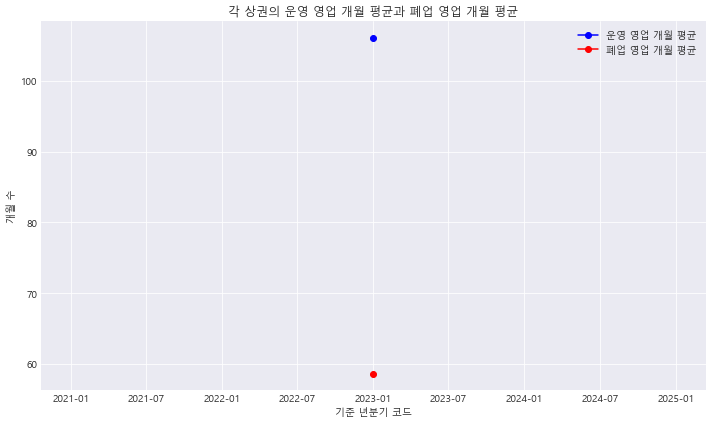

In [13]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 분기별로 데이터 그룹화
quarterly_data = target_market_data[target_market_data['Year'] == 2023].groupby("기준_년분기_코드").mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(quarterly_data["기준_년분기_코드"], quarterly_data["운영_영업_개월_평균"], marker='o', label='운영 영업 개월 평균', color='blue')
plt.plot(quarterly_data["기준_년분기_코드"], quarterly_data["폐업_영업_개월_평균"], marker='o', label='폐업 영업 개월 평균', color='red')

plt.title('각 상권의 운영 영업 개월 평균과 폐업 영업 개월 평균')
plt.xlabel('기준 년분기 코드')
plt.ylabel('개월 수')
plt.legend()
plt.tight_layout()
plt.show()

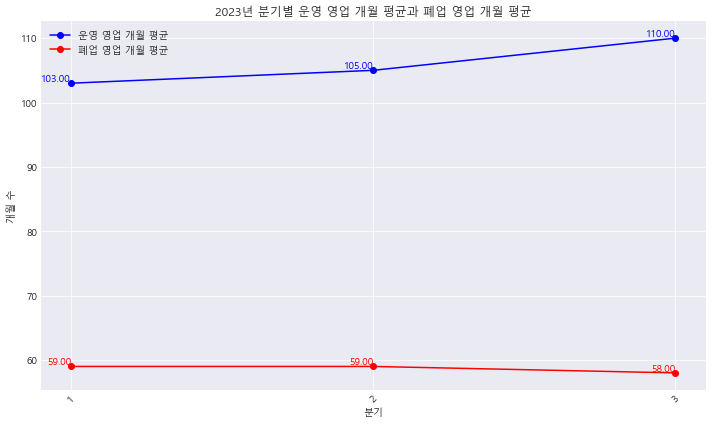

In [37]:
# 기준_년분기_코드를 문자열로 변환하여 연도와 분기를 추출
df['Year'] = df['기준_년분기_코드'].astype(str).str[:4]  # 연도 추출
df['Quarter'] = df['기준_년분기_코드'].astype(str).str[-1]  # 분기 추출

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

# 분기별로 데이터 그룹화하여 평균 계산
quarterly_data = target_market_data[target_market_data['Year'] == "2023"]

# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(quarterly_data["Quarter"], quarterly_data["운영_영업_개월_평균"], marker='o', label='운영 영업 개월 평균', color='blue')
plt.plot(quarterly_data["Quarter"], quarterly_data["폐업_영업_개월_평균"], marker='o', label='폐업 영업 개월 평균', color='red')

# 각 점에 데이터 텍스트 추가
for i, row in quarterly_data.iterrows():
    plt.text(row["Quarter"], row["운영_영업_개월_평균"], f'{row["운영_영업_개월_평균"]:.2f}', ha='right', va='bottom', fontsize=10, color='blue')
    plt.text(row["Quarter"], row["폐업_영업_개월_평균"], f'{row["폐업_영업_개월_평균"]:.2f}', ha='right', va='bottom', fontsize=10, color='red')

plt.title('2023년 분기별 운영 영업 개월 평균과 폐업 영업 개월 평균')
plt.xlabel('분기')
plt.ylabel('개월 수')
plt.legend()
plt.xticks(rotation=45)  # x 축 레이블 회전
plt.tight_layout()
plt.show()